<i> This notebook represents the lab-task associated with data pre-processing. </i> <br> <br>

    


<b> Data Processing </b> : <b> Data Processing </b> is the process of performing data operations to collect, convert and indentify data to generate useful informations. In this lab session we are going to handle noisy, inconsistent, intentional data using python library which can handle various type of encoding such as comma-separated values (CSV), eXtensible Markup Language (XML), Hyper Text Markup Langauge (HTML), Structured Query Language (SQL), JavaScript Object Notation (JSON) etc. For this encoding process different types of modules should be imported. Python's has different data pre-processing library where Pandas is one of them langauge package used for data processing.  

Now, I am going to walk through Python Data Preprocessing methods. 
    1. Importing the libraries
    2. Importing the dataset
    3. Handling the Missing data
    4. Split the dataset into training and testing datasets.
    5. Feature Scaling

## Importing the libraries

In [22]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


<b> Pandas </b> : Pandas is the most popular and favourite data science library wriiten in th Python Programming Language for data manipulation and analysis also pandas provides fast analysis as well as data cleaning and preparation. The best is that Pandas can work with variety of data such as: Excel Sheet, csv file, SQL file or even a webpage. Some of the features using Python Pandas library are listed below:
    1. Pandas DataFrame makes manipulting data easy, we are able to select, replace columns and rows and even reshape our data.
    2. Pandas allows to perform contitional selecting conditional selection using bracket notation []. 
    3. Pandas allow index of a DataFrame
    4. Pandas allow setting the index of a DataFrame.
    5. Pandas will automaticallt fill in those missing points with a NaN or Null value, also we can replace our missing values using .fillna() method.
    6. Pandas has a .groupby() method which is used to group together rows based off a column so that we can perform aggregate functions (sum, mean. median, standard deviation)
    7. Pandas allows to get the number of times occurs in a DataFrame.
    8. Pandas has .describe() method is used to get an overview of DataFrame.
    9.Similarly , we can concatenate, merge and join multiple DataFrame, 

All those above point proved that Python's Pandas library is suitable for data preprocessing.

<b> Numpy </b> : Numpy is a package used for scientific calculating and perform various operations. Numpy Array is a multidimensional array whose indexed is similar to Sequencess which is start with zero that is used to store values of same datatype. Numpy in the python uses less memory to store data as compared with python list. Numpy provides multiple functions they are nonzero and count_nonzero for finding the element. Using Numpy Library we can speed up our workflow and interface with other package in python ecosystem.  

<b> Matplotlib </b>: Malplotlib which was introduced  by John Hunter is a multi-platform data visulization library built on Numpy arrays and designed to work with broader SciPy stack. Similary,  matplotlib.pyplot is a collection of command style functions that make matplotlib work like MATLAB. Pyplot is mainly intented for interative plots and simple cases of programmatic plot generations.

## Importing the dataset

The below command is used to import CSV dataset

In [23]:
data = pd.read_csv('./Dataset./Data.csv')
data

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


Let's check the number of rows and columns in our dataset where rows and columns are stores as a tuple (number of rows, number of columns). In our imported dataset there are 10 rows and 4 columns.

In [24]:
data.shape

(10, 4)

## To know whether any cell value is empty or not

The imported dataset contains null values.

In [25]:
data.isnull().values.any()

True

Now, our next tast is to separate features and label from our dataset. Our dataset contain 4 columns and 10 rows where columns 'Age' and 'Salary' is considered to be features and last column i.e. Purchased is considered as label. I have not included country column as features because to many features can confuse certain machine learning algorithm. Too much dimension acts as noise to our machine learning model. 
<br>

We need dimension reduction beacuse:

    1. The increase in the number of data dimensions make it more difficult for Machine Learning models to take all the representation into account which sometimes negatively impacted the accuracy of the outcome. This is called "Curse of Dimensionality" in the data world.
    2. More dimensions can be act as noise than a feature and some of the features might not be related to our outcome. Thus, unwanted features is just creating random weight for decision to made.
    3. Lower dimension means lower parameter to learn and practice. If our dataset have huge number of dimension occasionally cause noise, and model does not know anything. Therefore, the result of lower dimension give faster result and efficient model.
    4. In general, when the column decreases, then in most cases the number of rows needed to learn is also reduced.

In [26]:
features = data.iloc[ : ,1:3]
features

,Age,Salary
0,44.0,72000.0
1,27.0,48000.0
2,30.0,54000.0
3,38.0,61000.0
4,40.0,NaN
5,35.0,58000.0
6,NaN,52000.0
7,48.0,79000.0
8,50.0,83000.0
9,37.0,67000.0


In [27]:
labels = data.iloc[:, data.columns == 'Purchased'] #outcome predicted target or dependent variable
labels

,Purchased
0,No
1,Yes
2,No
3,No
4,Yes
5,Yes
6,No
7,Yes
8,No
9,Yes


In [28]:
dataset = pd.concat([features, labels], axis =1)
dataset

,Age,Salary,Purchased
0,44.0,72000.0,No
1,27.0,48000.0,Yes
2,30.0,54000.0,No
3,38.0,61000.0,No
4,40.0,NaN,Yes
5,35.0,58000.0,Yes
6,NaN,52000.0,No
7,48.0,79000.0,Yes
8,50.0,83000.0,No
9,37.0,67000.0,Yes


## Filling missing value
If you want to impute missing values with mean and you want to go column by column, then this will only impute with the mean of that column. This might be a little more readable.


In [29]:
dataset['Salary'].fillna((dataset['Salary'].mean()), inplace=True)
dataset['Age'].fillna((dataset['Age'].mean()), inplace=True)
dataset

# # # Taking care of missing data
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
# imputer = imputer.fit(X[:, 1:3])
# X[:, 1:3] = imputer.transform(X[:, 1:3])

,Age,Salary,Purchased
0,44.000000,72000.000000,No
1,27.000000,48000.000000,Yes
2,30.000000,54000.000000,No
3,38.000000,61000.000000,No
4,40.000000,63777.777778,Yes
5,35.000000,58000.000000,Yes
6,38.777778,52000.000000,No
7,48.000000,79000.000000,Yes
8,50.000000,83000.000000,No
9,37.000000,67000.000000,Yes


In [30]:
new_features = dataset.iloc[:,0:2]
new_features

,Age,Salary
0,44.000000,72000.000000
1,27.000000,48000.000000
2,30.000000,54000.000000
3,38.000000,61000.000000
4,40.000000,63777.777778
5,35.000000,58000.000000
6,38.777778,52000.000000
7,48.000000,79000.000000
8,50.000000,83000.000000
9,37.000000,67000.000000


In [31]:
new_label = dataset.iloc[:, dataset.columns == 'Purchased']
new_label

,Purchased
0,No
1,Yes
2,No
3,No
4,Yes
5,Yes
6,No
7,Yes
8,No
9,Yes


In the above Pucchased column which is label in our dataset contains categorical data. So sklearn provides LabelEncoder Library which is used to normalize labels also can be used to transform non-numerical labels to numerical labels and make it machine-readable form. Machine Learning algorithms can then decide in a better way on how those labels must be operated.
<br> 
After using LabelEncoder for Purchased Column then target label for Yes = 1 and No = 0 

In [32]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder() 
dataset['Purchased'] = lb.fit_transform(dataset['Purchased'])
dataset

,Age,Salary,Purchased
0,44.000000,72000.000000,0
1,27.000000,48000.000000,1
2,30.000000,54000.000000,0
3,38.000000,61000.000000,0
4,40.000000,63777.777778,1
5,35.000000,58000.000000,1
6,38.777778,52000.000000,0
7,48.000000,79000.000000,1
8,50.000000,83000.000000,0
9,37.000000,67000.000000,1


In [33]:
Purchased = dataset[dataset['Purchased'] == 1]
Not_Purchased = dataset[dataset['Purchased'] == 0]
print('Purchased a car           :' , Purchased.shape)
print('Not Purchased a car       :' , Not_Purchased.shape)

Purchased a car           : (5, 3)
Not Purchased a car       : (5, 3)


Pandas's value_counts() method is the built in pandas function that returns an object containing counts of unique value in sorted order.

In [34]:
dataset.Purchased.value_counts()

0    5
1    5
Name: Purchased, dtype: int64

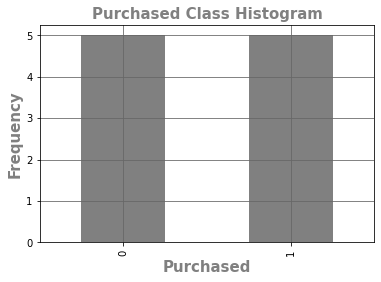

In [35]:
classes_count = pd.value_counts(dataset['Purchased'],sort = True).sort_index()
classes_count.plot(kind='bar', color = "Gray")
plt.title('Purchased Class Histogram', fontweight='bold', fontsize = '15', color = "gray")
plt.xlabel('Purchased', fontweight='bold', fontsize = '15', color = "gray")
plt.ylabel('Frequency', fontweight='bold', fontsize = '15', color = "gray")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.show()

StandardScaler performs the task of Standardization. Usually a dataset contains variables thar are different scale. 
For Example:
An Employee dataset will contain AGE column with values on Scale 20-70 and Salary column with Values on scale 10000 - 100000.
As these two columns are different in scale, they are Standardized to have common scale while building machine learning model. If we train our data without standardizing, our model is single biased. Here for example, salry ranges from 10000-100000 so it give more importance for salary. So good model should be non-biased and give equal importance. so if we standardize it . it will ranges equally and consider equally.


In [36]:
from sklearn.preprocessing import StandardScaler

scaler =StandardScaler()
dataset['normalized_age'] = scaler.fit_transform(dataset['Age'].values.reshape(-1,1))
dataset['normalized_salary'] = scaler.fit_transform(dataset['Salary'].values.reshape(-1,1))

# Reshape your data either X.reshape(-1, 1) if your data has a single feature/column 
# and X.reshape(1, -1) if it contains a single sample.
# For your example type(if you have more than one feature/column):

# temp = temp.reshape(1,-1) 
# For one feature/column:

# temp = temp.reshape(-1,1)

In [37]:
dataset = dataset.drop(['Age', 'Salary'], axis = 1)
dataset

,Purchased,normalized_age,normalized_salary
0,0,0.758874,7.494733e-01
1,1,-1.711504,-1.438178e+00
2,0,-1.275555,-8.912655e-01
3,0,-0.113024,-2.532004e-01
4,1,0.177609,6.632192e-16
5,1,-0.548973,-5.266569e-01
6,0,0.000000,-1.073570e+00
7,1,1.340140,1.387538e+00
8,0,1.630773,1.752147e+00
9,1,-0.258340,2.937125e-01


In [38]:
xData = dataset.iloc[:, dataset.columns != 'Purchased']
xData.head()

,normalized_age,normalized_salary
0,0.758874,7.494733e-01
1,-1.711504,-1.438178e+00
2,-1.275555,-8.912655e-01
3,-0.113024,-2.532004e-01
4,0.177609,6.632192e-16


In [39]:
yData = dataset.iloc[:, dataset.columns == 'Purchased']
yData.head()

,Purchased
0,0
1,1
2,0
3,0
4,1


Sklearn provides best function for partioning data into training set and testing set. We provide certain proportion of data to use as test set and we can provide the parameter random_state to ensure repeatable resuts. We split 80% of the data to the training set while 20% of data to the test using the below code. The test_size variable is where specify the propostion of the test set.

After spliting data into train set and test set, now our job is to train our algorithm. 
For that we need to import Library.

Now, call the fit() method along with our training data. After training our algorithm, now time to make some predictions. For this we are going to use our test data and see how correctly our algorithm predicts the percentage score.

In [40]:
#the test data randomly selected as uniiq values from data.If we give same data for test and training it
#gives 100% occuracy. Because we already trained for that. So testing must be uniqe values and must be done

In [41]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(xData, yData, test_size = 0.2, random_state = 584)

In [42]:
X_train.shape

(8, 2)

In [43]:
X_test.shape

(2, 2)

In [44]:
y_train.shape

(8, 1)

In [45]:
y_test.shape

(2, 1)

In [46]:
X_train

,normalized_age,normalized_salary
6,0.000000,-1.073570
9,-0.258340,0.293712
5,-0.548973,-0.526657
8,1.630773,1.752147
2,-1.275555,-0.891265
7,1.340140,1.387538
3,-0.113024,-0.253200
1,-1.711504,-1.438178


In [47]:
X_test

,normalized_age,normalized_salary
4,0.177609,6.632192e-16
0,0.758874,7.494733e-01


In [48]:
y_train

,Purchased
6,0
9,1
5,1
8,0
2,0
7,1
3,0
1,1


In [49]:
y_test

,Purchased
4,1
0,0
